<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/Prevendo_Fal%C3%AAncias_Empresas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='purple'> Prevendo Falência de Empresas - Criando Variáveis para Análise de Risco </font>


# 1° Problema de Negócio



Neste Projeto, os Cientistas de Dados precisam construir Máquinas Preditivas para ver o quão precisos eles são em detectar se podemos prever corretamente quais empresas enfrentarão a bancarrota no futuro. 

![](https://www.sinapromg.com.br/wp-content/uploads/2020/08/banner-94292-analise-de-dados-e-carreira-por-que-ter-o-dominio-das-ferramentas-780x450-1.jpg) 
Além disso, neste projeto, devemos usar as variáveis para entender seu impacto / papel nos modelos/Máquinas Preditivas selecionadas e como eles podem nos ajudar a reconhecer as empresas que estão à beira da falência. 

O conjunto de dados contém:

**95 Variáveis** referentes às empresas de Taiwan no período de 10 anos.

![](https://files.caetreinamentos.com.br/blog/wp-content/uploads/2019/09/04170302/o-que-e-gestao-riscos-770x417.jpg)

Foram coletados **dados** da *Taiwan Economic Journal* referentes à aproximadamente **10 anos** de histórico de dados que representam a **falência de empresas** com base nos regulamentos de negócios da Bolsa de Valores de **Taiwan**.

![](https://ehsbrasil.com/wp-content/uploads/analise_risco@2x.png)



Utilização de **Índices financeiros e indicadores de governança corporativa** na previsão de falências

# Benefícios do Projeto

* A previsão eficaz de falências é crítica para que as instituições financeiras tomem as **decisões de empréstimo apropriadas**, como Bancos e Financeiras.

* Análise para definição de **Parcerias Estratégicas**

* Criação de **Sociedades** de Capital

* Análise de Empresas para decisões de **Investimento**.

* Aporte financeiro em Fintechs






# 2° Análise Exploratória 

### Fonte de Dados:
https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

![](https://cienciadosdados.com/images/2021/Thumbs/kgl.png)

In [1]:
# runtime
import timeit

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

# Ml model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

np.warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('falencia.csv')

print(bank.isnull().values.any())
print(bank.shape)

bank

False
(6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

# 3° Pré-Processamento dos Dados

In [4]:
# training set
X = bank.iloc[:,1:].values
y = bank.iloc[:,0].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### **RFE - feature engineering - Eliminação Recursiva de Atributos - feature_selection**
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Dado um estimador externo que atribui pesos aos recursos (por exemplo, os coeficientes de um modelo linear), o objetivo da eliminação recursiva de recursos (RFE) é selecionar recursos considerando recursivamente conjuntos cada vez menores de recursos. 

Primeiro, o estimador é treinado no conjunto inicial de recursos e a importância de cada recurso é obtida por meio de qualquer atributo específico ou chamável. 

Em seguida, os recursos menos importantes são removidos do conjunto atual de recursos. Esse procedimento é repetido recursivamente no conjunto podado até que o número desejado de recursos a serem selecionados seja atingido.

In [5]:
# determining optimal number of features

start = timeit.default_timer()


n_features = [5, 10, 15, 20, 25, 30, 35, 40]
for i in n_features:
    # Building the model based feature selection
    select = RFE(RandomForestClassifier(n_estimators=100, random_state=7), n_features_to_select=i)

    select.fit(X_train, y_train)

    mask = select.get_support()

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
    
    print("Test score: {:.3f}".format(score), " number of features: {}".format(i))

stop = timeit.default_timer()
print('Time: ', stop - start)  


Test score: 0.965  number of features: 5
Test score: 0.972  number of features: 10
Test score: 0.975  number of features: 15
Test score: 0.971  number of features: 20
Test score: 0.972  number of features: 25
Test score: 0.972  number of features: 30
Test score: 0.971  number of features: 35
Test score: 0.972  number of features: 40
Time:  1222.670089536


Não há tanta diferença entre as pontuações com recursos diferentes. Vamos trabalhar com 25 recursos, pois é um número 'viável' de recursos e tem uma boa pontuação. Vamos executar o algoritmo novamente e obter os recursos

In [6]:
#eliminação recursiva
select = RFE(RandomForestClassifier(n_estimators=100, random_state=7), n_features_to_select=25)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(25))

features = pd.DataFrame({'features':list(bank.iloc[:,1:].keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
features.append('Bankrupt?')

Test score: 0.972  number of features: 25


In [7]:
# As principais Variáveis
bank = bank[features]
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0    ROA(B) before interest and depreciation after tax   6819 non-null   float64
 1    Non-industry income and expenditure/revenue         6819 non-null   float64
 2    Interest-bearing debt interest rate                 6819 non-null   float64
 3    Net Value Per Share (B)                             6819 non-null   float64
 4    Net Value Per Share (A)                             6819 non-null   float64
 5    Persistent EPS in the Last Four Seasons             6819 non-null   float64
 6    Per Share Net profit before tax (Yuan ¥)            6819 non-null   float64
 7    Net Value Growth Rate                               6819 non-null   float64
 8    Interest Expense Ratio                              6819 non-null  

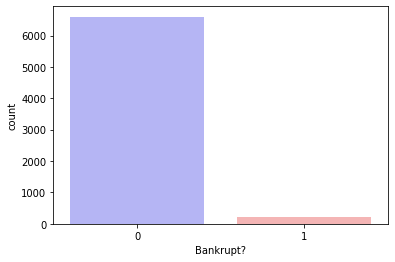

Bankrupt?
0    6599
1     220
dtype: int64

In [ ]:
# Gráficos
sns.countplot(data=bank, x='Bankrupt?', palette='bwr')
plt.show()

bank.groupby('Bankrupt?').size()

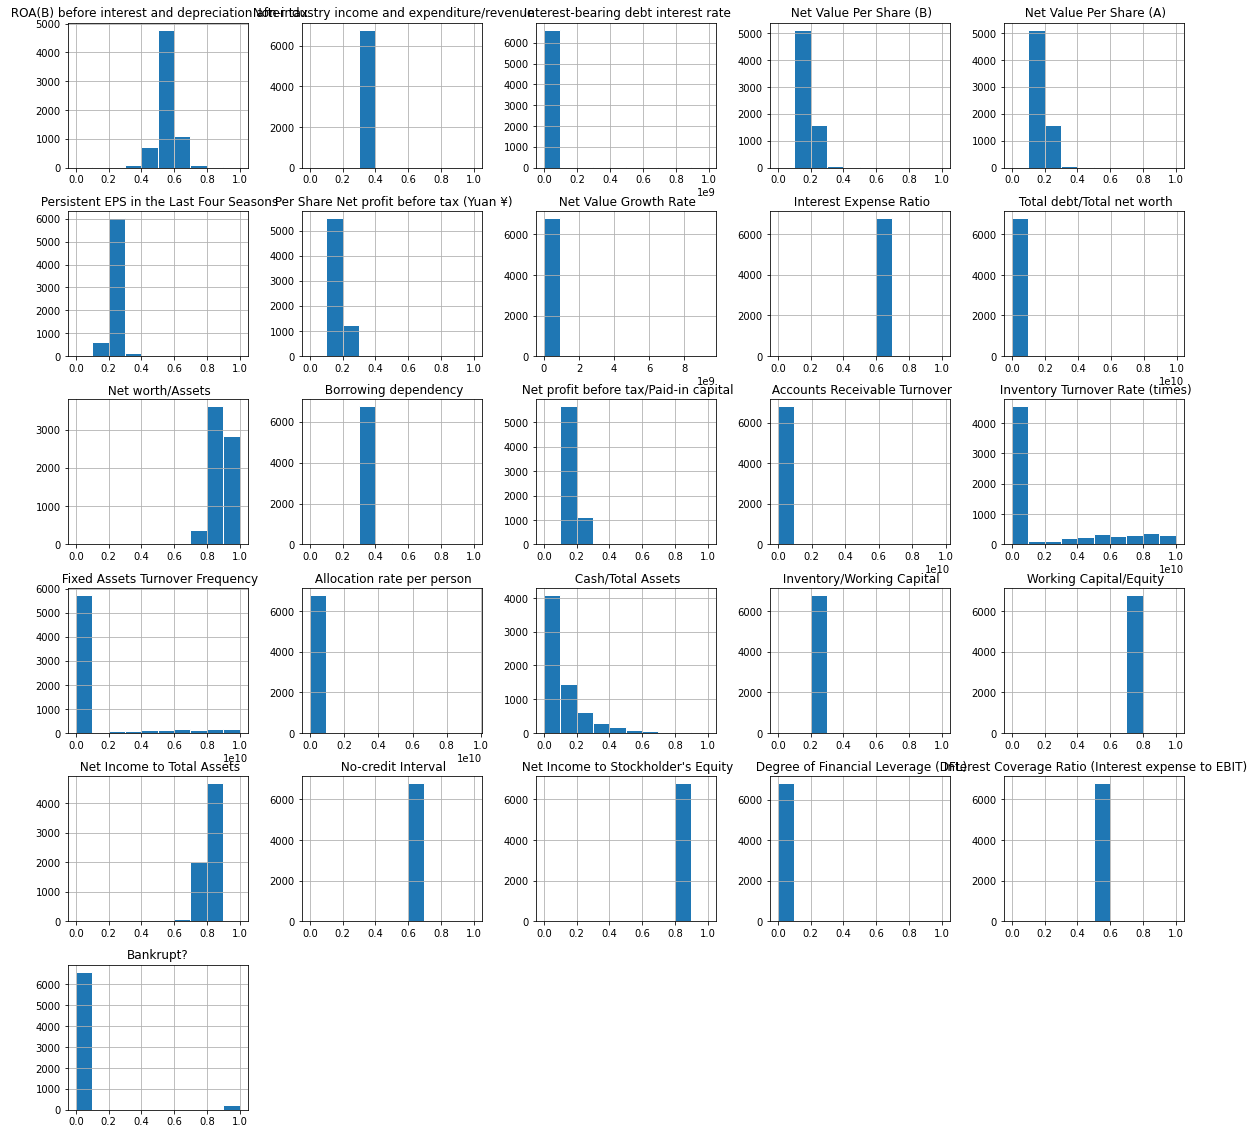

In [ ]:
bank.hist(figsize=(20,20), edgecolor='white')
plt.show()

Rows with outliers: 6819
Rows withou outliers: 6631
information lost = 188 rows


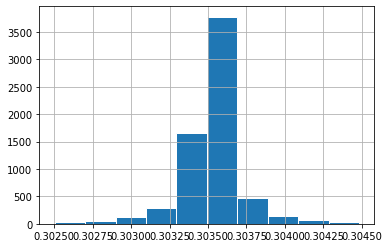

In [ ]:
# Avaliando Outliers
lower = bank[' Non-industry income and expenditure/revenue'] >0.3025
upper = bank[' Non-industry income and expenditure/revenue'] <0.3045

close = bank[lower & upper]
print('Rows with outliers: {}'.format(bank.shape[0]))
print('Rows withou outliers: {}'.format(close.shape[0]))
print('information lost = {} rows'.format(bank.shape[0]-close.shape[0]))
close[' Non-industry income and expenditure/revenue'].hist(edgecolor='white')

A distribuição tem uma distribuição normal, mas é altamente influenciada pelos outliers. **Portanto, ao analisar os dados, será melhor usar a mediana como nossa ferramenta de análise para medidas centrais**. Além disso, quando estamos construindo nosso modelo, podemos tentar eliminar esses valores discrepantes apenas para ver se podemos obter um resultado melhor

In [ ]:
display(bank.describe())
bank.shape

,ROA(B) before interest and depreciation after tax,Non-industry income and expenditure/revenue,Interest-bearing debt interest rate,Net Value Per Share (B),Net Value Per Share (A),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Net Value Growth Rate,Interest Expense Ratio,Total debt/Total net worth,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Accounts Receivable Turnover,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Allocation rate per person,Cash/Total Assets,Inventory/Working Capital,Working Capital/Equity,Net Income to Total Assets,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Bankrupt?
count,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.553589,0.303623,1.644801e+07,0.190661,0.190633,0.228813,0.184361,1.566212e+06,0.630991,4.416337e+06,0.886823,0.374654,0.182715,1.278971e+07,2.149106e+09,1.008596e+09,1.125579e+07,0.124095,0.277395,0.735817,0.807760,0.623915,0.840402,0.027541,0.565358,0.032263
std,0.061595,0.011163,1.082750e+08,0.033390,0.033474,0.033263,0.033180,1.141594e+08,0.011238,1.684069e+08,0.053920,0.016286,0.030785,2.782598e+08,3.247967e+09,2.477557e+09,2.945063e+08,0.139251,0.010469,0.011678,0.040332,0.012290,0.014523,0.015668,0.013214,0.176710
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.527277,0.303466,2.030203e-04,0.173613,0.173613,0.214711,0.170370,4.409689e-04,0.630612,3.007049e-03,0.851196,0.370168,0.169376,7.101336e-04,1.728256e-04,2.330013e-04,4.120529e-03,0.033543,0.277034,0.733612,0.796750,0.623636,0.840115,0.026791,0.565158,0.000000
50%,0.552278,0.303525,3.210321e-04,0.184400,0.184400,0.224544,0.179709,4.619555e-04,0.630698,5.546284e-03,0.888593,0.372624,0.178456,9.678107e-04,7.646743e-04,5.930942e-04,7.844373e-03,0.074887,0.277178,0.736013,0.810619,0.623879,0.841179,0.026808,0.565252,0.000000
75%,0.584105,0.303585,5.325533e-04,0.199570,0.199570,0.238820,0.193493,4.993621e-04,0.631125,9.273293e-03,0.927109,0.376271,0.191607,1.454759e-03,4.620000e+09,3.652371e-03,1.502031e-02,0.161073,0.277429,0.738560,0.826455,0.624168,0.842357,0.026913,0.565725,0.000000
max,1.000000,1.000000,9.900000e+08,1.000000,1.000000,1.000000,1.000000,9.330000e+09,1.000000,9.940000e+09,1.000000,1.000000,1.000000,9.740000e+09,9.990000e+09,9.990000e+09,9.570000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(6819, 26)

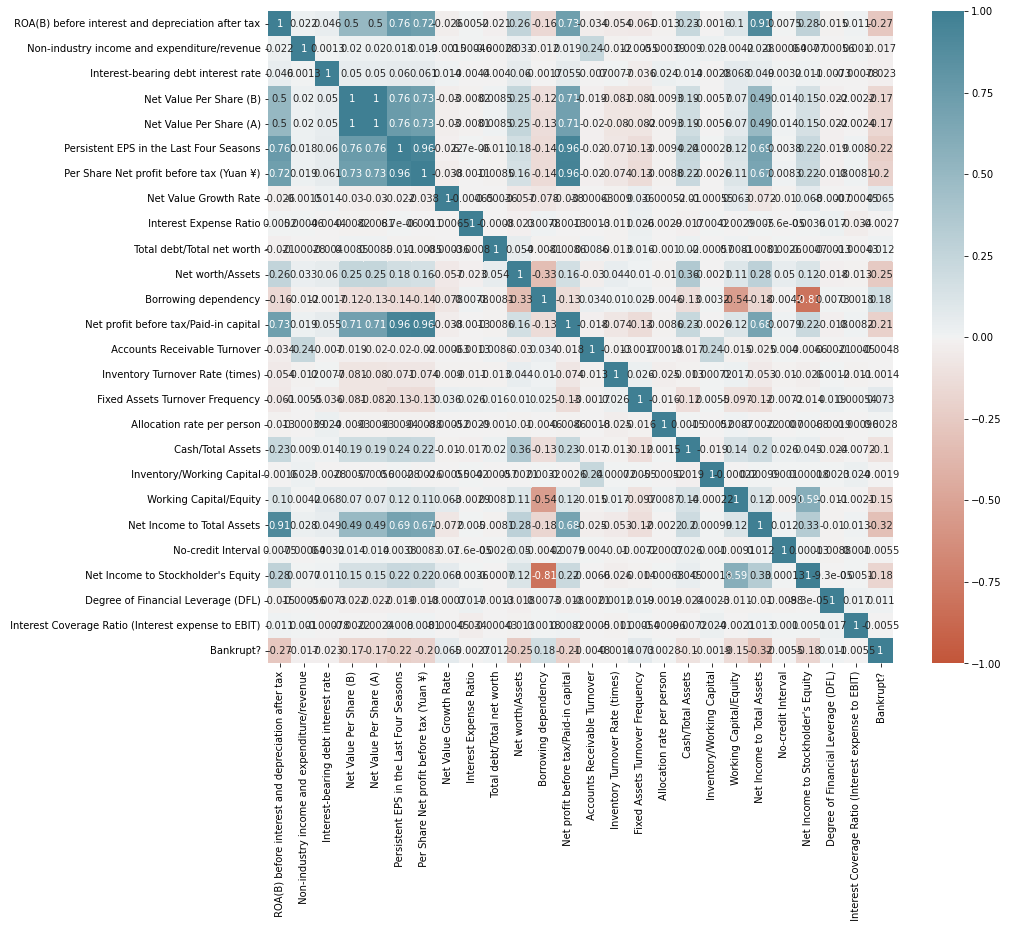

In [ ]:
fig, ax = plt.subplots(figsize=(14,12))

sns.heatmap(bank.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

Temos algumas correlações interessantes. Vamos inspecionar os 3 principais e ver se podemos encontrar algum padrão de falência

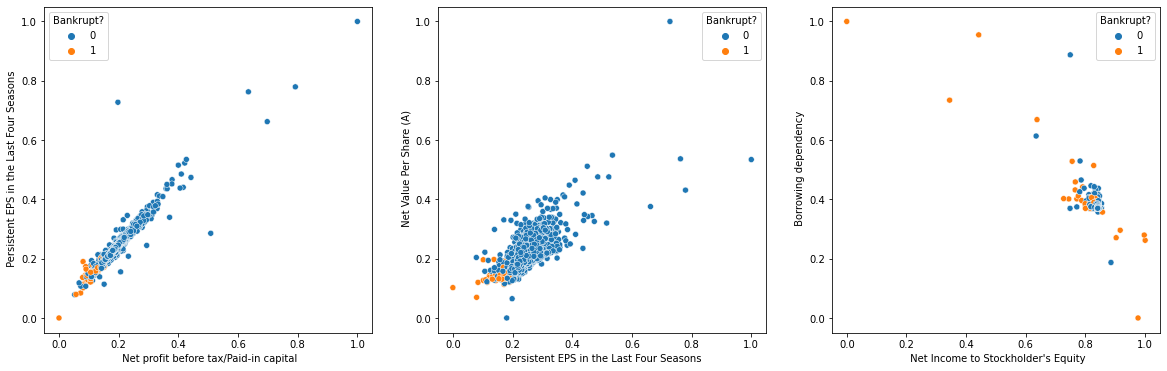

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))

sns.scatterplot(data=bank, x=' Net profit before tax/Paid-in capital', y=' Persistent EPS in the Last Four Seasons', hue='Bankrupt?', ax=ax[0])
sns.scatterplot(data=bank, x=' Persistent EPS in the Last Four Seasons', y=' Net Value Per Share (A)', hue='Bankrupt?', ax=ax[1])
sns.scatterplot(data=bank, x=" Net Income to Stockholder's Equity", y=' Borrowing dependency', hue='Bankrupt?', ax=ax[2])

Começamos a ver alguns padrões

empresas com um baixo 'Lucro líquido antes de impostos / capital integralizado', 'EPS persistente nas últimas quatro temporadas' e 'Valor líquido por ação (A)' tendem a falir
'Dependência de empréstimos' tem empresas falidas distribuídas por todo o seu alcance. Mas, em torno de 0,4, estão localizadas as empresas que não vão à falência. Ter em torno de 0,4 não é garantia de falência, pois há muitas empresas que faliram com esse índice, mas ter um índice mais alto ou mais baixo parece ser crítico, já que não há empresas operando com esse tipo de índice. O mesmo vale para "Lucro líquido sobre patrimônio líquido", mas em torno de 0,8

Conclusões da análise descritiva
Temos dados altamente desequilibrados. Portanto, vamos tentar aplicar a sobreamostragem
A maioria dos recursos tem valores discrepantes. A mediana será um método de análise melhor e, também, retirar alguns outliers será uma boa ideia ao construir o modelo
empresas com baixo 'Lucro líquido antes de impostos / capital integralizado', 'EPS persistente nas últimas quatro temporadas' e 'Valor líquido por ação (A)' tendem a falir. Um algoritmo KNN produziria bons resultados, uma vez que os clusters são tão evidentes
0.4 'Dependência de empréstimo' é um bom indicador para operar, mas não o protege completamente da falência
0.8 "Lucro líquido sobre o patrimônio líquido" é um bom indicador para operar, mas não o protege completamente da falência

#### Vamos comparar a mediana de empresas falidas e não falidas de cada recurso para ver se podemos encontrar uma tendência

IndexError: ignored

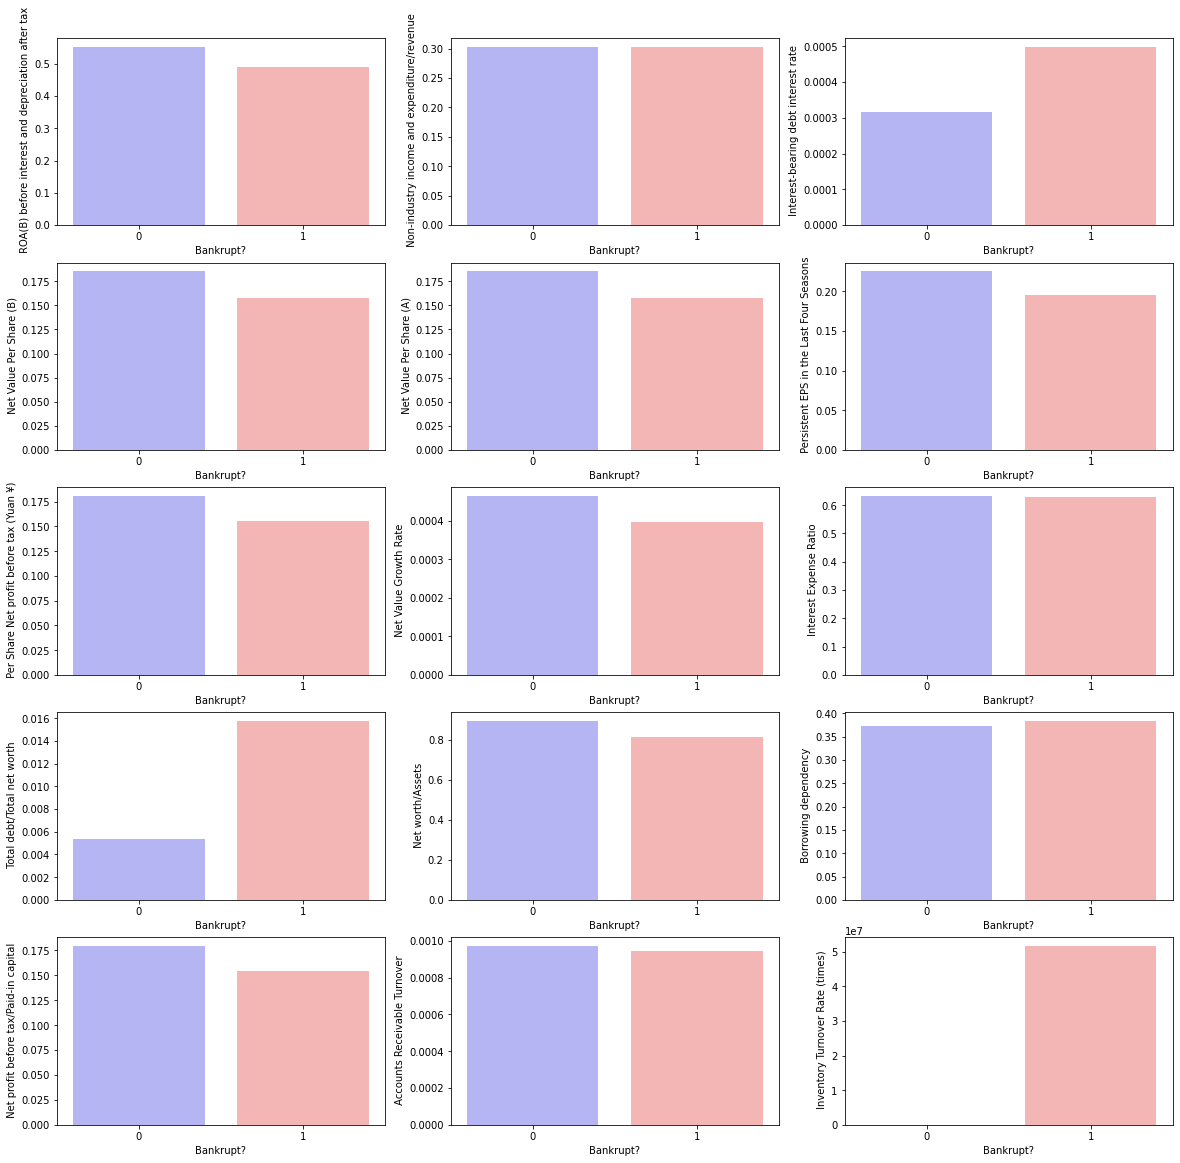

In [ ]:
central = bank.groupby('Bankrupt?').median().reset_index()
features = list(central.keys()[1:])

fig, ax = plt.subplots(5,3, figsize=(20,20))

ax = ax.ravel()
position = 0

for i in features:
    sns.barplot(data=central, x='Bankrupt?', y=i, ax=ax[position], palette='bwr')
    position += 1
    
plt.show()
display(central)

Conclusões da análise de dados
Vamos citar as tendências mais evidentes:

Empresas com:

alta "taxa de juros da dívida com juros" tende a ir à falência (≈ 0,000499)

alta "Dívida total / patrimônio líquido total" tende a ir à falência (≈ 0,015723)

alta "Frequência de giro de ativos fixos" tende a ir à falência (≈ 0,001225)

baixo "Caixa / Ativo total" tende a ir à falência (≈ 0,023755)

"Patrimônio líquido para passivo" baixo tende a ir à falência (≈ 0,018662)


Além disso, esses indicadores devem ser suficientes para construir um modelo confiável, uma vez que a tendência é muito clara. 

**Vamos construir nossa Máquina Preditiva**

# 4° Criando Máquinas Preditivas

## KNN
Um KNN, se nos lembrarmos das conclusões da seção 3 e 4, um algoritmo KNN com características 
'Lucro líquido antes de impostos / Capital integralizado',

'EPS persistente nas últimas quatro temporadas', "Taxa de juros da dívida com juros", 

"Dívida total / Patrimônio líquido total ",

" Frequência de giro do ativo fixo "," Caixa / Ativo total Equidade para passivo 


Também temos que levar em consideração que estamos lidando com dados altamente desequilibrados,

então a (oversampling) sobreamostragem fará parte da fase de pré-processamento.

In [ ]:
# Criando a máquina
model = ['Bankrupt?', ' Net profit before tax/Paid-in capital', ' Persistent EPS in the Last Four Seasons', " Interest-bearing debt interest rate", " Total debt/Total net worth", " Fixed Assets Turnover Frequency", " Cash/Total Assets"]
model = bank[model]
X = model.iloc[:,1:].values
y = model.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

best_n = 0
best_training = 0
best_test = 0

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    training = knn.score(X_train, y_train)
    test = knn.score(X_test, y_test)
    
    if test > best_test:
        best_n = i
        best_training = training
        best_test = test

print("best number of neighbors: {}".format(best_n))
print("best training set score : {:.3f}".format(best_training))
print("best test set score: {:.3f}".format(best_test))


best number of neighbors: 7
best training set score : 0.970
best test set score: 0.969


In [ ]:
start = timeit.default_timer()

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("training set score : {:.2f}".format(knn.score(X_train, y_train)))
print("test set score: {:.2f}".format(knn.score(X_test, y_test)))

stop = timeit.default_timer()
print('Time: ', stop - start)  

training set score : 0.97
test set score: 0.97
Time:  0.44279416900008073


### GBM - Classificador Gradient Boosting

Aqui, vamos primeiro aplicar um classificador mais sofisticado em nossos dados reduzidos e, em seguida, em todo o conjunto de dados. No final, comparamos os três modelos

In [ ]:
X = model.iloc[:,1:].values
y = model.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

start = timeit.default_timer()
gbrt = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=1).fit(X_train, y_train)

print("training set score : {:.2f}".format(gbrt.score(X_train, y_train)))
print("test set score: {:.2f}".format(gbrt.score(X_test, y_test)))

stop = timeit.default_timer()
print('Time: ', stop - start)  

training set score : 0.97
test set score: 0.97
Time:  0.39097098899947014


### Preste atenção:

### Gradient Boosting Classifer (com todas as 95 variáveis)

In [ ]:
bank = pd.read_csv('falencia.csv')
X = bank.iloc[:,1:].values
y = bank.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

start = timeit.default_timer()
gbrt = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=1).fit(X_train, y_train)

print("training set score : {:.2f}".format(gbrt.score(X_train, y_train)))
print("test set score: {:.2f}".format(gbrt.score(X_test, y_test)))

stop = timeit.default_timer()
print('Time: ', stop - start)

training set score : 0.97
test set score: 0.97
Time:  4.567556455999693


CONCLUSÃO

Conseguimos construir três modelos com uma precisão definida de 0,97, enquanto reduzimos significativamente o número de recursos (apenas 7).

Isso nos levou a economizar tempo de execução (de 5,47 segundos para apenas 0,5)

Com os recursos reduzidos, também pudemos descrever como uma empresa pode ir à falência ou não, explicando melhor o modelo. 

As conclusões dos recursos foram:
Empresas com:

alta "taxa de juros da dívida com juros" tende a ir à falência (≈ 0,000499)

alta "Dívida total / patrimônio líquido total" tende a ir à falência (≈ 0,015723)

alta "Frequência de giro de ativos fixos" tende a ir à falência (≈ 0,001225)

baixo "Caixa / Ativo total" tende a ir à falência (≈ 0,023755)

"Patrimônio líquido para passivo" baixo tende a ir à falência (≈ 0,018662)

empresas com um baixo 'Lucro líquido antes de impostos / capital integralizado', 'EPS persistente nas últimas quatro temporadas' e 'Valor líquido por ação (A)' **tendem a falir**